Dans un paysage commercial de plus en plus compétitif, la capacité à comprendre les données relatives aux ventes est cruciale pour toute entreprise cherchant à rester pertinente et prospère. À cet égard, l'analyse des données de ventes peut fournir des insights précieux pour guider les décisions stratégiques et tactiques. Dans le cadre de ce projet, nous nous concentrerons sur l'exploitation d'une base de données contenant des informations détaillées sur les ventes, telles que les ID de commande, les produits vendus, les quantités commandées, les prix unitaires, les dates de commande, les adresses d'achat, les villes, et plus encore.

L'objectif principal de ce projet est d'explorer ces données afin de répondre à plusieurs questions clés visant à améliorer les performances des ventes de l'entreprise. Nous chercherons à identifier les tendances, les modèles et les opportunités cachées dans les données, en utilisant une combinaison de techniques d'analyse de données et de visualisation.

Description textuelle du bd
 * Notre base contienne 6 colonnes (Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,ville) qui sont de type object. Elle contienne des valeurs nulles lesquelles nous allons les éliminés.
Veuillez trouver ci-dessous les questions aux quelles nous allons répondre dans le but d'améliorer les ventes

problématiques principales : amélioration des ventes


 Les questions aux quelles nous allons répondre : 
 * Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire?
 * Quelle est la ville qui réalise la plus de vente ?
 * En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes?
 * Quel produit se vent le plus?
 * Quelles sont les combinaisons de produits qui se vendent le plus?
 
Nous allons répondre aux questions susmentionnées en utilisant une variété de graphiques et de visualisations de données. Ces graphiques nous permettront de présenter de manière claire et concise les tendances, les patterns et les insights tirés de l'analyse des données de vente, offrant ainsi une perspective visuelle et accessible pour informer les décisions stratégiques de l'entreprise. 

In [2]:
import os #manipuler plusieurs fichiers
import pandas as pd
import matplotlib.pyplot as plt#pour la visualisation
import seaborn as sns 

In [3]:
files=[file for file in os.listdir('C:/Users/ghaou/Desktop/data_analysis_project/data-sales')]
for file in files:
    if file.endswith('.csv'):
        print (file)


all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
path='C:/Users/ghaou/Desktop/data_analysis_project/data-sales'
#Creer une base de données vide
all_data=pd.DataFrame()
#Concaténer nos les base de données
for file in files:
    if file.endswith('.csv'):
        current_data=pd.read_csv(path+'/'+ file)
        all_data=pd.concat([all_data,current_data] )
print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [5]:
all_data.to_csv(path+'/all_data.csv',index=False)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121100 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Order ID          1117830 non-null  object
 1   Product           1117830 non-null  object
 2   Quantity Ordered  1117830 non-null  object
 3   Price Each        1117830 non-null  object
 4   Order Date        1117830 non-null  object
 5   Purchase Address  1117830 non-null  object
dtypes: object(6)
memory usage: 59.9+ MB


In [7]:
all_data.isnull().sum()

Order ID            3270
Product             3270
Quantity Ordered    3270
Price Each          3270
Order Date          3270
Purchase Address    3270
dtype: int64

In [8]:
all_data=all_data.dropna(how='all')

In [9]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1117830 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Order ID          1117830 non-null  object
 1   Product           1117830 non-null  object
 2   Quantity Ordered  1117830 non-null  object
 3   Price Each        1117830 non-null  object
 4   Order Date        1117830 non-null  object
 5   Purchase Address  1117830 non-null  object
dtypes: object(6)
memory usage: 59.7+ MB


In [12]:
all_data=all_data[all_data['Price Each']!='Price Each']


In [13]:
P1=all_data['Product'].value_counts(sort=False,normalize=True)

In [14]:
P2=all_data['Price Each'].value_counts(sort=False,normalize=True)

In [15]:
P1

Product
USB-C Charging Cable          0.117790
Bose SoundSport Headphones    0.071659
Google Phone                  0.029712
Wired Headphones              0.101543
Macbook Pro Laptop            0.025405
Lightning Charging Cable      0.116472
27in 4K Gaming Monitor        0.033504
AA Batteries (4-pack)         0.110659
Apple Airpods Headphones      0.083619
AAA Batteries (4-pack)        0.111003
iPhone                        0.036795
Flatscreen TV                 0.025813
27in FHD Monitor              0.040371
20in Monitor                  0.022054
LG Dryer                      0.003474
ThinkPad Laptop               0.022200
Vareebadd Phone               0.011105
LG Washing Machine            0.003582
34in Ultrawide Monitor        0.033240
Name: proportion, dtype: float64

In [16]:
P2

Price Each
11.95     0.117790
99.99     0.071659
600       0.029524
11.99     0.101543
1700      0.025286
14.95     0.116472
389.99    0.033504
3.84      0.110659
150       0.083087
2.99      0.111003
700       0.036590
300       0.025706
149.99    0.040371
109.99    0.022054
600.0     0.007244
999.99    0.022200
400       0.011057
379.99    0.033240
700.0     0.000204
1700.0    0.000118
150.0     0.000532
300.0     0.000108
400.0     0.000048
Name: proportion, dtype: float64

# Quel est le mois durant lequel nous avons réalisé le meilleur chiffre d'affaire?

In [19]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [26]:
all_data["month"] = all_data["Order Date"].str.split("/").str[0]


C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\1398881244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["month"] = all_data["Order Date"].str.split("/").str[0]


In [27]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [28]:
all_data['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [30]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115700 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Order ID          1115700 non-null  object
 1   Product           1115700 non-null  object
 2   Quantity Ordered  1115700 non-null  object
 3   Price Each        1115700 non-null  object
 4   Order Date        1115700 non-null  object
 5   Purchase Address  1115700 non-null  object
 6   month             1115700 non-null  object
dtypes: object(7)
memory usage: 100.3+ MB


In [31]:
#ici j'ai changé le type des données que je vais les utilisé pour le calcul
all_data['month']=all_data['month'].astype('int64')
all_data['Price Each']=all_data['Price Each'].astype('float')
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int64')
all_data.dtypes

C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\3755574979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['month']=all_data['month'].astype('int64')
C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\3755574979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype('float')
C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\3755574979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [32]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']

C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\2224557042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']


In [33]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [39]:
all_data.groupby('month')['sales'].sum()

month
1     10933540.38
2     13212134.52
3     16842602.28
4     20344021.44
5     18915640.50
6     15466813.56
7     15886654.56
8     13466807.28
9     12585360.78
10    22420361.28
11    19197619.20
12    27680660.04
Name: sales, dtype: float64

Text(0.5, 1.0, 'Sales grouped by months')

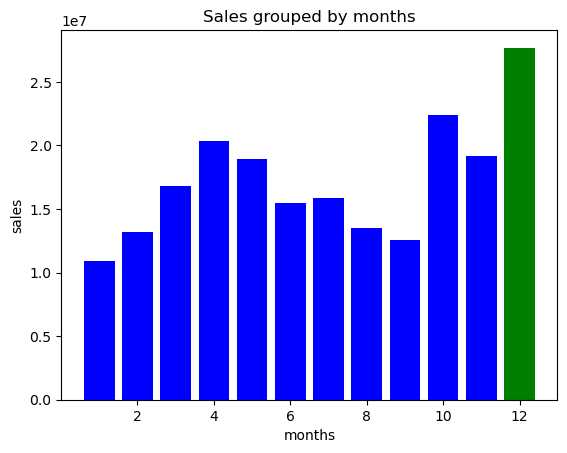

In [54]:
sales=all_data.groupby('month')['sales'].sum()
months=range(1,13)
max_sales=sales.argmax()

colors = ['blue'] * len(months)  # Couleur par défaut pour toutes les barres
colors[max_sales] = 'green'

plt.bar(months,sales,color=colors)

plt.xlabel('months')
plt.ylabel('sales')
plt.title('Sales grouped by months')

# Quelle est la ville qui réalise la plus de vente ?

In [57]:
all_data["ville"] = all_data["Purchase Address"].str.split(",").str[1]


C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\151450298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["ville"] = all_data["Purchase Address"].str.split(",").str[1]


In [58]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [59]:
all_data.groupby('ville')['sales'].sum()

ville
 Atlanta          16772991.48
 Austin           10917490.50
 Boston           21969852.06
 Dallas           16607852.40
 Los Angeles      32715424.80
 New York City    27985904.58
 Portland         13922943.66
 San Francisco    49573223.46
 Seattle          16486532.88
Name: sales, dtype: float64

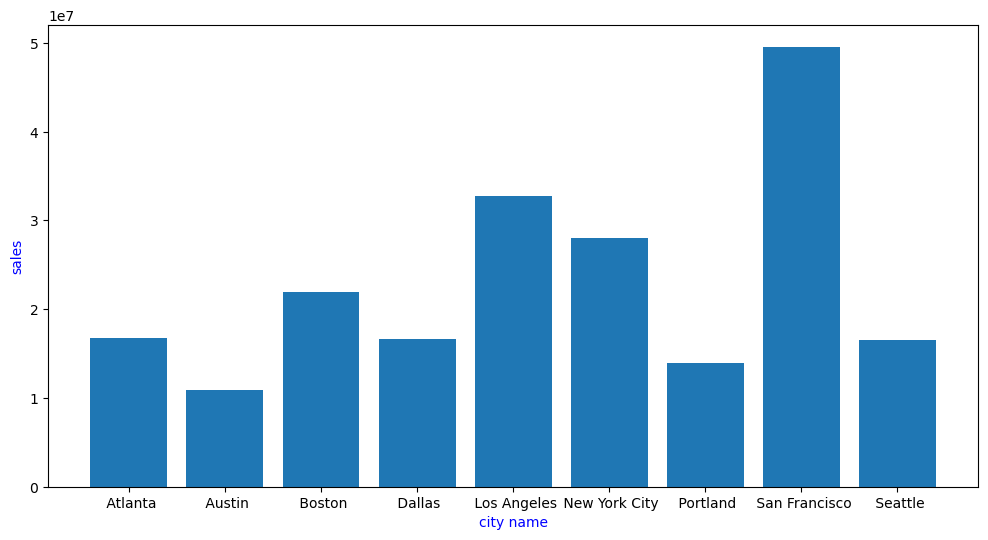

In [63]:
plt.figure(figsize=(12, 6))
plt.bar(all_data.groupby('ville')['sales'].sum().index,all_data.groupby('ville')['sales'].sum().values)
#plt.xticks(ville)
plt.ylabel('sales', color='blue')
plt.xlabel('city name', color='blue')
plt.show()

# En quelle moment doit on faire une compagne publicitaire pour avoir plus de ventes?

In [68]:
def hour(x):
    return x.split(" ")[1].split(":")[0]

In [69]:
all_data["hour"]=all_data["Order Date"].apply(hour)
all_data

C:\Users\ghaou\AppData\Local\Temp\ipykernel_2392\2009354552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["hour"]=all_data["Order Date"].apply(hour)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,ville,hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,07
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [70]:
hourly_sales = all_data.groupby('hour')['sales'].sum()
hours = hourly_sales.index
sales = hourly_sales.values
max_sales_index = sales.argmax()

Text(0.5, 1.0, 'évolution des ventes dans le temps')

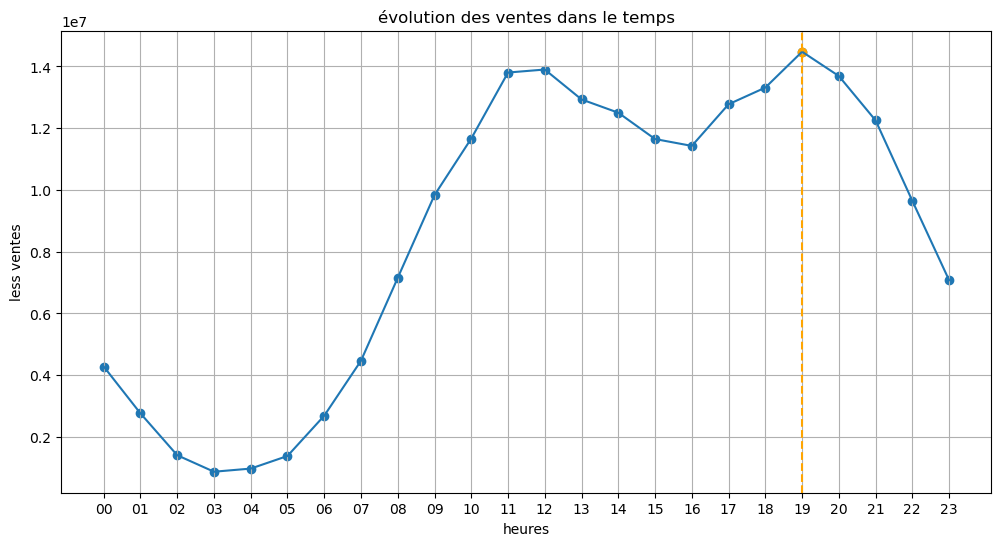

In [71]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(hours,sales)
plt.scatter(hours,sales)
plt.scatter(hours[max_sales_index], sales[max_sales_index], c='orange', label='Highest point')  # Couleur orange pour la plus haute point
plt.axvline(x=hours[max_sales_index], color='orange', linestyle='--')
plt.xlabel("heures")
plt.ylabel("less ventes")
plt.title("évolution des ventes dans le temps")

# Quel produit se vent le plus?

In [72]:
all_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   24774
27in 4K Gaming Monitor         37464
27in FHD Monitor               45300
34in Ultrawide Monitor         37194
AA Batteries (4-pack)         165810
AAA Batteries (4-pack)        186102
Apple Airpods Headphones       93966
Bose SoundSport Headphones     80742
Flatscreen TV                  28914
Google Phone                   33192
LG Dryer                        3876
LG Washing Machine              3996
Lightning Charging Cable      139302
Macbook Pro Laptop             28368
ThinkPad Laptop                24780
USB-C Charging Cable          143850
Vareebadd Phone                12408
Wired Headphones              123342
iPhone                         41094
Name: Quantity Ordered, dtype: int64

Text(0, 0.5, 'Quantity Ordered')

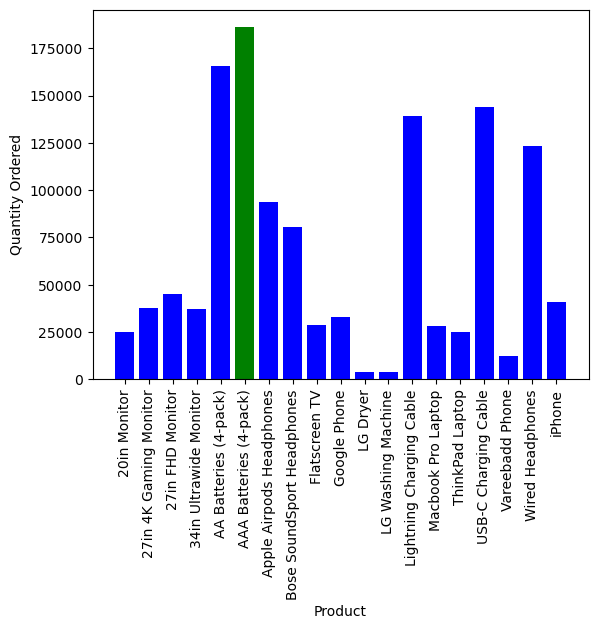

In [73]:
products = all_data.groupby('Product')['Quantity Ordered'].sum()
product_names = products.index
quantity_ordered = products.values

max_quantity_index = quantity_ordered.argmax()

colors = ['blue'] * len(product_names)  # Couleur par défaut pour toutes les barres
colors[max_quantity_index] = 'green'
plt.bar(product_names, quantity_ordered, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')


# Quelles sont les combinaisons de produits qui se vendent le plus?

In [74]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [76]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [77]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,ville,hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,08,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,09,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,07,"iPhone,iPhone,iPhone,iPhone,iPhone,iPhone"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [78]:
df['Grouped']

0        USB-C Charging Cable,USB-C Charging Cable,USB-...
2        Bose SoundSport Headphones,Bose SoundSport Hea...
3        Google Phone,Wired Headphones,Google Phone,Wir...
4        Google Phone,Wired Headphones,Google Phone,Wir...
5        Wired Headphones,Wired Headphones,Wired Headph...
                               ...                        
11681    AAA Batteries (4-pack),AAA Batteries (4-pack),...
11682            iPhone,iPhone,iPhone,iPhone,iPhone,iPhone
11683            iPhone,iPhone,iPhone,iPhone,iPhone,iPhone
11684    34in Ultrawide Monitor,34in Ultrawide Monitor,...
11685    USB-C Charging Cable,USB-C Charging Cable,USB-...
Name: Grouped, Length: 1115700, dtype: object